# Vortex Wavefront propagation
## Imports and parameters

In [1]:
#%pylab
from VORTEX.Tools.misc import cart2pol
import VORTEX.Tools.img_processing as impro
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create lambda functions for fourier transforms
fft = lambda x: np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))
ifft = lambda x: np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))

In [3]:
# input parameter
N = 2**10               # sampling
Plim = 1.5              # size of the pupil for display, in radii
Flim = 100              # size of the image for display, in lam/D
vmin, vmax = -2, 6      # colorbar limits
# sampling
R = int(np.sqrt(N*np.pi))
def round_to_odd(x):
    x1 = x + 0.5
    n = int(x1)
    if not (n % 2):
        n += 1 if int(x1) == int(x) else -1
    return n
D = round_to_odd(2*R)   # pupil sampling
#lamD = N/D              # number of samples in the image plane corresponding to lambda f-number
crop = 0.4              # portion cropped for imshow (0 to 0.5)
cropN = int(N*crop)
extent = [-D/2*(0.5-crop),(D/2+1)*(0.5-crop),-D/2*(0.5-crop),(D/2+1)*(0.5-crop)]
print('npupil = %s'%D)

npupil = 113


## Entrance pupil

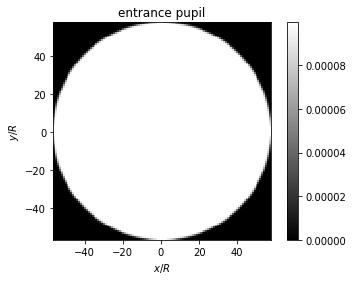

In [4]:
pup_range = np.arange(-1, 1, 2/N) + 1/N
xi,yi = np.meshgrid(pup_range, pup_range)
zi = xi + 1j*yi
ri = np.abs(zi)
ti = np.angle(zi)
PP = (ri<=1).astype(int)
PP = impro.resize_img(np.float32(PP), D)
flux = np.sum(abs(PP))
PP /= flux
plt.imshow(abs(PP), origin='lower', cmap="gray", extent=[-D/2,D/2+1,-D/2,D/2+1])
plt.colorbar()
plt.title('entrance pupil')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

## Vortex phase ramp

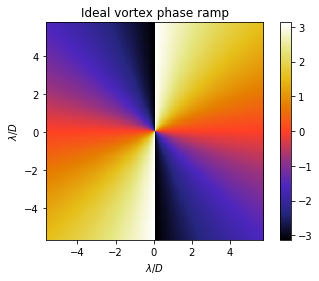

In [5]:
V = np.exp(1j*2*ti)
plt.imshow(np.angle(V)[cropN:-cropN,cropN:-cropN], origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('Ideal vortex phase ramp')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

## Modified pupil (perfect vortex)

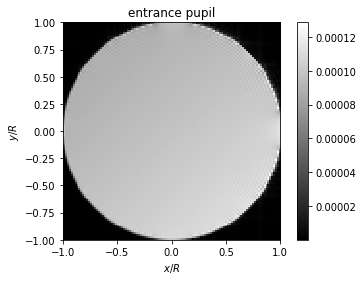

In [6]:
PP_pad = impro.pad_img(PP, N)
LS = fft(fft(PP_pad)*V)
LS_param = 1#0.95
LS[ri*N<=D*LS_param] = 0
PP = ifft(ifft(LS)/V)
plt.figure(1)
start = int((N-D)/2)+1
end = int((N+D)/2)+1
plt.imshow(abs(PP[start:end,start:end]), origin='lower', cmap="gray", extent=[-1,1,-1,1])
plt.colorbar()
plt.title('entrance pupil')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

## PSF before vortex

peak = 0.9881308635671587


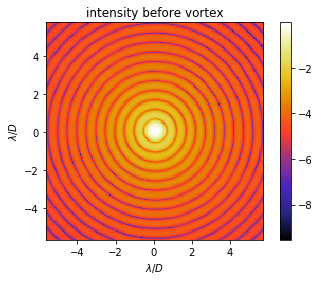

In [7]:
FP = fft(PP)
peak = np.max(np.abs(FP)**2)
print('peak = %s'%peak)
plt.imshow(np.log10(np.abs(FP[cropN:-cropN,cropN:-cropN])**2), origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('intensity before vortex')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

### Phase before vortex

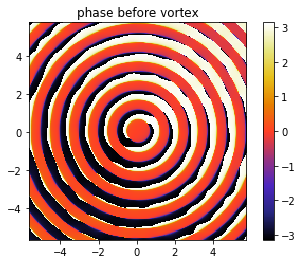

In [8]:
plt.imshow(np.angle(FP[cropN:-cropN,cropN:-cropN]), origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('phase before vortex');

## Measured vortex phase ramp (with error)

rms = 0.009994976729702914


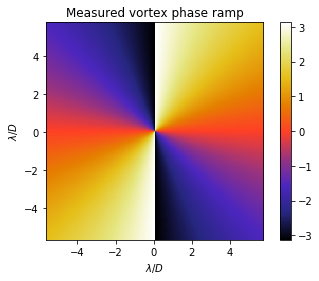

In [9]:
rms = 1e-2 # rms error in rad
noise = np.random.standard_normal(FP.shape)*rms
#noise = 0 # <-- uncomment this to set the error to 0
print('rms = %s'%np.std(noise))
Verr = np.exp(1j*2*ti+noise)
plt.imshow(np.angle(Verr)[cropN:-cropN,cropN:-cropN], origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('Measured vortex phase ramp')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

## Intensity after vortex

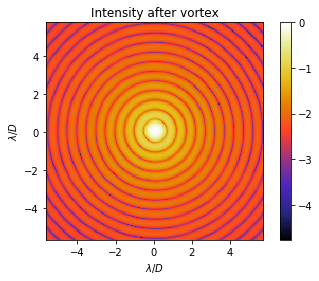

In [10]:
plt.imshow(np.log10(np.abs(FP*Verr))[cropN:-cropN,cropN:-cropN], origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('Intensity after vortex')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

### Phase after vortex

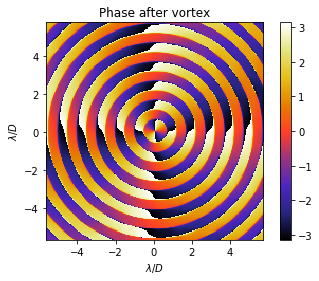

In [11]:
plt.imshow(np.angle(FP*Verr)[cropN:-cropN,cropN:-cropN], origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('Phase after vortex')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

## Lyot Stop

### Before lyot stop

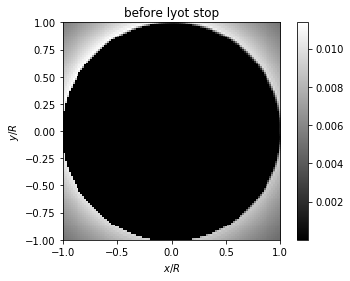

In [12]:
LS = fft(FP*Verr)/flux
start = int((N-D)/2)+1
end = int((N+D)/2)+1
plt.imshow(abs(LS[start:end,start:end]), origin='lower', cmap="gray", extent=[-1,1,-1,1])
plt.colorbar()
plt.title('before lyot stop')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

### After lyot stop

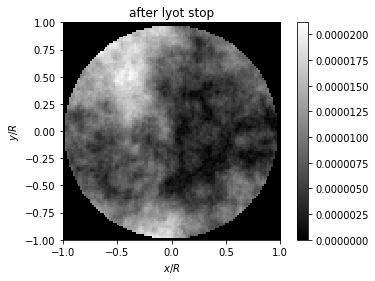

In [13]:
LS_param = 0.98
LS[ri*N>D*LS_param] = 0
plt.imshow(abs(LS[start:end,start:end]), origin='lower', cmap="gray", extent=[-1,1,-1,1])
plt.colorbar()
plt.title('after lyot stop')
plt.xlabel('$x/R$');plt.ylabel('$y/R$');

## Intensity at the detector

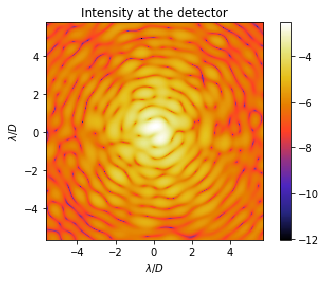

In [14]:
PSF = fft(LS)
plt.imshow(np.log10(np.abs(PSF)**2)[cropN:-cropN,cropN:-cropN], origin='lower', cmap="CMRmap", extent=extent)
plt.colorbar()
plt.title('Intensity at the detector')
plt.xlabel('$\lambda/D$');plt.ylabel('$\lambda/D$');

In [15]:
np.max(np.log10(np.abs(PSF)**2))

-2.5145997737988615